In [1]:
import lightgbm as lgb
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import graphviz

In [126]:
df = pd.read_csv('train.csv')
df.head(20)

,label,query,term,cid3,brand,ctf,ctf_cofidence,rf,icf,icf_confidence,icf_max,igm,entropy
0,0,蒙牛熟炭烧,熟,13604,0,0.000166,0.000311,1.005749,1.606720,1.382896,1.267313,0.001006,23.568409
1,1,蒙牛熟炭烧,炭烧,13604,0,0.028298,0.044012,1.994725,2.758024,2.692507,2.417343,0.017914,4.479587
2,2,蒙牛熟炭烧,蒙牛,13604,1,0.164207,0.434249,3.116467,3.389669,3.355368,3.047349,0.023766,4.482465
3,0,蒜香鸡爪自营,自营,17720,0,0.000909,0.001114,1.953166,1.350502,1.050598,1.011227,0.001265,16.611746
4,1,蒜香鸡爪自营,蒜香,17720,0,0.022401,0.060762,4.021842,3.470004,3.438393,3.127392,0.015356,4.306950
5,2,蒜香鸡爪自营,鸡爪,17720,0,0.340484,1.000000,9.450327,3.009072,2.958476,2.667859,0.020885,3.256540
6,0,蓝光钢化膜,蓝光,867,0,0.230688,0.417453,8.336581,1.730940,1.535998,1.391455,0.001295,19.562365
7,1,蓝光钢化膜,钢化膜,867,0,0.771181,0.603069,6.954835,3.040744,2.991764,2.699454,0.012063,10.357600
8,0,蓝牙对讲机京东自营,蓝牙,18524,0,0.052831,0.045346,1.250454,1.586860,1.357991,1.247464,0.000354,63.971256
9,1,蓝牙对讲机京东自营,对讲机,18524,0,1.297248,0.762734,6.601784,2.851843,2.792371,2.510978,0.035906,3.362894


In [8]:
df.columns

Index(['label', 'query', 'term', 'cid3', 'brand', 'ctf', 'ctf_cofidence', 'rf',
       'icf', 'icf_confidence', 'icf_max', 'igm', 'entropy'],
      dtype='object')

In [109]:
X = df.drop(['label','query','term','ctf_cofidence'], axis=1)
y = df.label

In [13]:
y.head()

0    0
1    1
2    2
3    0
4    1
Name: label, dtype: int64

In [110]:
X.head()

,cid3,brand,ctf,rf,icf,icf_confidence,icf_max,igm,entropy
0,13604,0,0.000166,1.005749,1.606720,1.382896,1.267313,0.001006,23.568409
1,13604,0,0.028298,1.994725,2.758024,2.692507,2.417343,0.017914,4.479587
2,13604,1,0.164207,3.116467,3.389669,3.355368,3.047349,0.023766,4.482465
3,17720,0,0.000909,1.953166,1.350502,1.050598,1.011227,0.001265,16.611746
4,17720,0,0.022401,4.021842,3.470004,3.438393,3.127392,0.015356,4.306950


In [111]:
group=np.loadtxt('./group.txt')

In [17]:
group[0]

3.0

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [20]:
X_train.shape

(80000, 10)

In [21]:
y_train.shape

(80000,)

In [112]:
train_data = lgb.Dataset(X, label=y, group=group,free_raw_data=False)

In [143]:
params = {
    'task' : 'train', 
    'boosting_type': 'gbdt',
    'objective': 'lambdarank',
    'num_iterations': 100,
    'learning_rate':0.01,
    'num_leaves': 31,
    'tree_learner': 'serial',
    'max_depth': 1,
    'metric': 'ndcg',
    'metric_freq': 10,
    'train_metric':True,
    #'ndcg_at':[5],
    #'max_bin':255,
    #'max_position': 5,
    'verbose':-1
}

In [113]:
categorical_feature=[0,1]
feature_name = X.columns
feature_name

Index(['cid3', 'brand', 'ctf', 'rf', 'icf', 'icf_confidence', 'icf_max', 'igm',
       'entropy'],
      dtype='object')

In [144]:
gbm=lgb.train(params,
              train_data,
              valid_sets=train_data,
              categorical_feature=categorical_feature)

/media/cfs/zhangjun386/.pylib/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's ndcg@1: 0.827208	training's ndcg@2: 0.915797	training's ndcg@3: 0.933031	training's ndcg@4: 0.934676	training's ndcg@5: 0.934717
[2]	training's ndcg@1: 0.850973	training's ndcg@2: 0.927074	training's ndcg@3: 0.941954	training's ndcg@4: 0.943297	training's ndcg@5: 0.943329
[3]	training's ndcg@1: 0.860262	training's ndcg@2: 0.93101	training's ndcg@3: 0.945229	training's ndcg@4: 0.946545	training's ndcg@5: 0.946577
[4]	training's ndcg@1: 0.86748	training's ndcg@2: 0.935459	training's ndcg@3: 0.948315	training's ndcg@4: 0.949488	training's ndcg@5: 0.949516
[5]	training's ndcg@1: 0.870361	training's ndcg@2: 0.936802	training's ndcg@3: 0.949402	training's ndcg@4: 0.950562	training's ndcg@5: 0.950589
[6]	training's ndcg@1: 0.878114	training's ndcg@2: 0.940573	training's ndcg@3: 0.952337	training's ndcg@4: 0.953399	training's ndcg@5: 0.953425
[7]	training's ndcg@1: 0.882327	training's ndcg@2: 0.94278	training's ndcg@3: 0.954053	training's ndcg@4: 0.95504	training's ndcg@5: 0.955

In [145]:
gbm.save_model('model.txt')

In [146]:
bst = lgb.Booster(model_file='model.txt')

In [147]:
y_pred = bst.predict(X_train)

In [148]:
y_pred[0:20]

array([ 0.0953342 ,  0.06218727,  0.19133717, -0.03305418,  0.22432032,
        0.32376076, -0.06719544, -0.14347286, -0.02790183, -0.03821245,
        0.1435546 ,  0.01233221,  0.32376076,  0.10562939, -0.12094931,
       -0.04379177,  0.18468437,  0.10143828,  0.06181377,  0.22303378])

In [142]:
y_pred[0:20]

array([-0.00230217,  0.04026367,  0.05886939, -0.07612573,  0.10762921,
        0.17127281, -0.07100379, -0.1195112 , -0.05004771, -0.0825191 ,
        0.05658022, -0.05004771,  0.17127281,  0.01425573, -0.14078834,
       -0.0825191 ,  0.05886939,  0.0204227 , -0.10244982,  0.10991838])

In [41]:
y_pred[1]

0.13584097871591141

In [70]:
graph = lgb.create_tree_digraph(bst, tree_index=0, name='tree' + str(0))
#graph.render(filename='./tree_plot', view=True)

In [69]:
import graphviz

In [71]:
bst.feature_name()

['cid3',
 'brand',
 'ctf',
 'ctf_cofidence',
 'rf',
 'icf',
 'icf_confidence',
 'icf_max',
 'igm',
 'entropy']

In [72]:
bst.feature_importance()

array([1694,  229,  399,   99,  157,   90,    4,   14,  300,   14])

In [73]:
print(f'Feature importances: {list(bst.feature_importance())}')

Feature importances: [1694, 229, 399, 99, 157, 90, 4, 14, 300, 14]


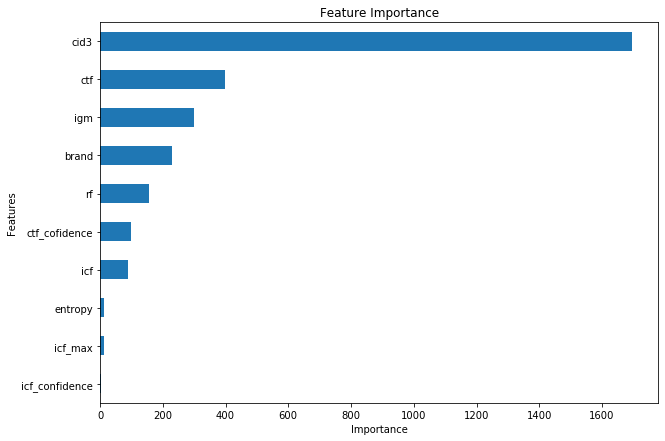

In [76]:
fea_imp = pd.DataFrame({'imp': bst.feature_importance(importance_type='split'), 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

In [77]:
explainer = shap.TreeExplainer(bst)

In [79]:
shap_values = explainer.shap_values(X)

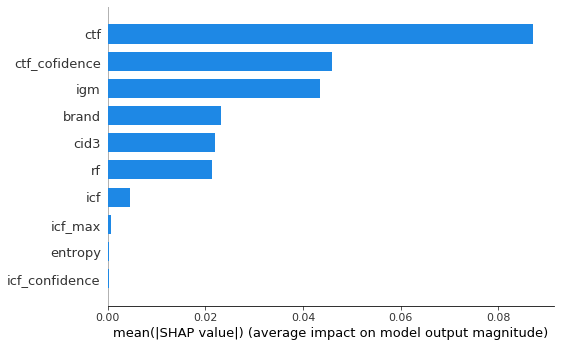

In [80]:
shap.summary_plot(shap_values, X, plot_type="bar")

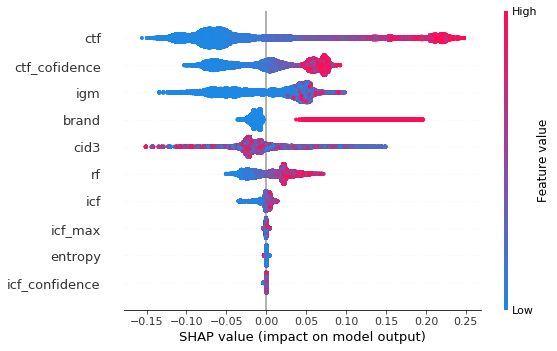

In [81]:
shap.summary_plot(shap_values, X)

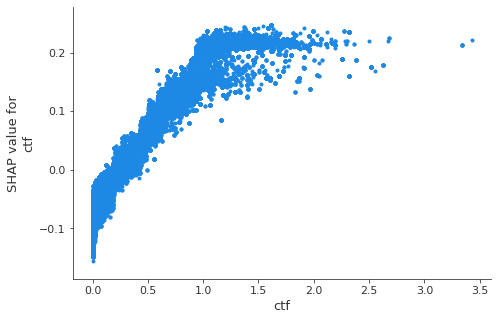

In [83]:
 shap.dependence_plot('ctf', shap_values, X, interaction_index=None, show=True)

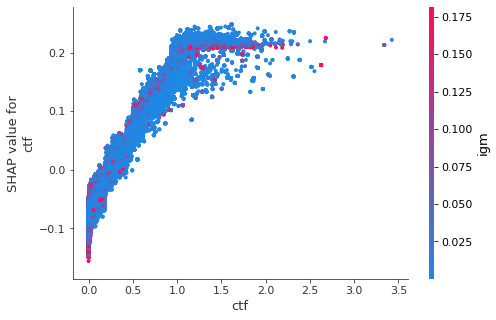

In [84]:
shap.dependence_plot('ctf', shap_values, X, interaction_index='igm', show=True)

In [87]:
ypred = bst.predict(X, pred_leaf=True)

In [88]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
x_one_hot = one_hot_encoder.fit_transform(ypred)

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [89]:
print(x_one_hot.shape)

(100000, 3100)


In [90]:
 print(x_one_hot[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

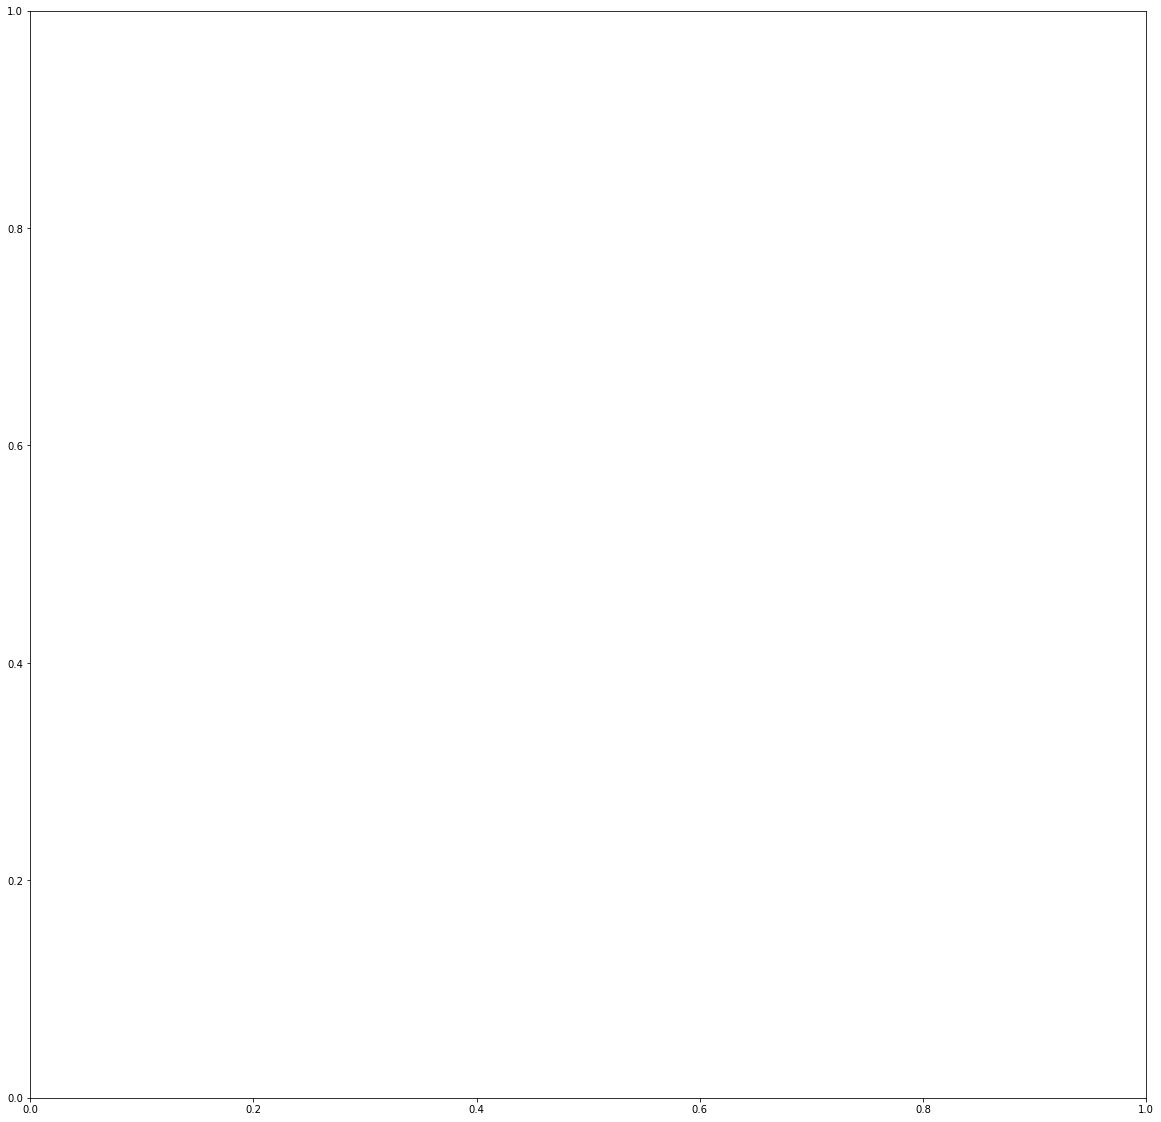

In [149]:
fig2 = plt.figure(figsize=(20, 20))
ax = fig2.subplots()
lgb.plot_tree(bst, tree_index=1, ax=ax)
plt.show()